<a href="https://colab.research.google.com/github/alectivski/Tubes-SKO/blob/main/TubesSKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.8 #Responsivitas
SM = 6   #Safety Margin
M = -0.23 #Tambahan daya sinyal OPD
q = 1.6*10**-19 #Muatan
id = 90*10**-9 #Dark Current
B = 8*10**9 #Bandwidth
F = 1 #Factor Gain
K = 1.38*10**-23 #Konstanta Boltzman
Temp = 300 #Temperature
RL = 50 #Resistance Equivalent

#Parameter Pr
#jarak dari sentral ke ONU = 13 km
#jarak dari ONU ke Roset = <500 m --> 5*10 = 50 m 
#jarak total = 13000 + 50 = 13050 m

d = np.arange(0.05,13.050,1) #Jarak (km)
L_fiber = 0.32 #berdasarkan jenis G625D (dB)  
N_splicer = 6 #Jumlah Splicer
L_splicer = 0.2 #Loss dari splicer (db)
N_connector = 4 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 13 + 15 
Pt = 2 #Daya tx (dBm)

In [21]:
#RUMUS PR
def P_receive():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  print("Redaman Total =", alfa_total)
  Pr = (Pt - alfa_total)
  return Pr

Pr = P_receive()

print("Daya Terima = ", Pr, "dBm")

Redaman Total = [36.416 36.736 37.056 37.376 37.696 38.016 38.336 38.656 38.976 39.296
 39.616 39.936 40.256 40.576 40.896 41.216 41.536 41.856 42.176 42.496
 42.816 43.136 43.456 43.776 44.096]
Daya Terima =  [-34.416 -34.736 -35.056 -35.376 -35.696 -36.016 -36.336 -36.656 -36.976
 -37.296 -37.616 -37.936 -38.256 -38.576 -38.896 -39.216 -39.536 -39.856
 -40.176 -40.496 -40.816 -41.136 -41.456 -41.776 -42.096] dBm


In [22]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [2.89394309e-04 2.68837586e-04 2.49741081e-04 2.32001070e-04
 2.15521195e-04 2.00211946e-04 1.85990168e-04 1.72778614e-04
 1.60505525e-04 1.49104238e-04 1.38512825e-04 1.28673759e-04
 1.19533597e-04 1.11042693e-04 1.03154930e-04 9.58274622e-05
 8.90204913e-05 8.26970442e-05 7.68227743e-05 7.13657751e-05
 6.62964062e-05 6.15871330e-05 5.72123764e-05 5.31483746e-05
 4.93730535e-05]


In [24]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [4.43032561e-09 3.82327596e-09 3.29940514e-09 2.84731585e-09
 2.45717250e-09 2.12048715e-09 1.82993493e-09 1.57919458e-09
 1.36281105e-09 1.17607670e-09 1.01492896e-09 8.75861922e-10
 7.55850050e-10 6.52282378e-10 5.62905700e-10 4.85775543e-10
 4.19213873e-10 3.61772579e-10 3.12201975e-10 2.69423607e-10
 2.32506793e-10 2.00648375e-10 1.73155243e-10 1.49429260e-10
 1.28954246e-10]


In [25]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Temp*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[32.16876642 31.53326525 30.8974487  30.26133859 29.62495529 28.98831779
 28.35144377 27.71434972 27.07705099 26.43956188 25.80189572 25.16406491
 24.52608098 23.88795468 23.24969601 22.61131427 21.97281812 21.33421561
 20.69551424 20.05672097 19.41784228 18.7788842  18.13985233 17.50075189
 16.86158772]


In [26]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[20.29590051 18.86397738 17.53244314 16.29434599 15.14320386 14.07297427
 13.07802589 12.15311172 11.29334391 10.49417008  9.75135103  9.0609399
  8.41926255  7.82289927  7.26866753  6.75360595  6.27495926  5.83016418
  5.41683636  5.03275806  4.67586666  4.34424404  4.03610653  3.74979563
  3.48376932]


In [27]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[1.81313395e-88 2.52903662e-76 7.84853169e-66 9.06346416e-57
 6.07904959e-49 3.48151043e-42 2.37632389e-36 2.57950999e-31
 5.71526811e-27 3.20724628e-23 5.49381418e-20 3.37549523e-17
 8.55269287e-15 1.00817160e-12 6.13606537e-11 2.10999221e-09
 4.43101837e-08 6.07797850e-07 5.77133222e-06 3.98885939e-05
 2.09557694e-04 8.68765027e-04 2.93555441e-03 8.31375616e-03
 2.02162012e-02]


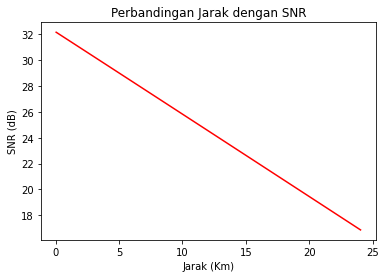

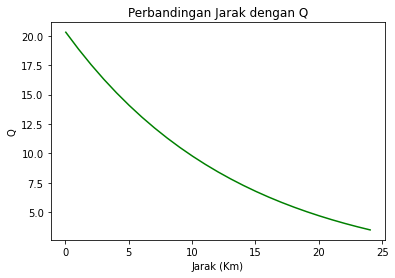

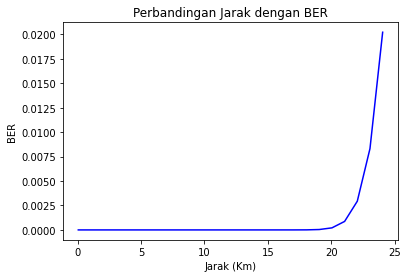

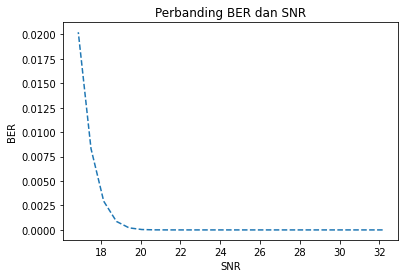

In [28]:
#GRAFIK
def grafik_pertama():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_kedua():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_ketiga():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def grafik_perbandingan_SNR_BER():
  plt.figure()
  plt.plot(SNR,BER,'--')
  plt.title('Perbanding BER dan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()
  

grafik_pertama()
grafik_kedua()
grafik_ketiga()
grafik_perbandingan_SNR_BER()